<Figure size 1000x600 with 0 Axes>

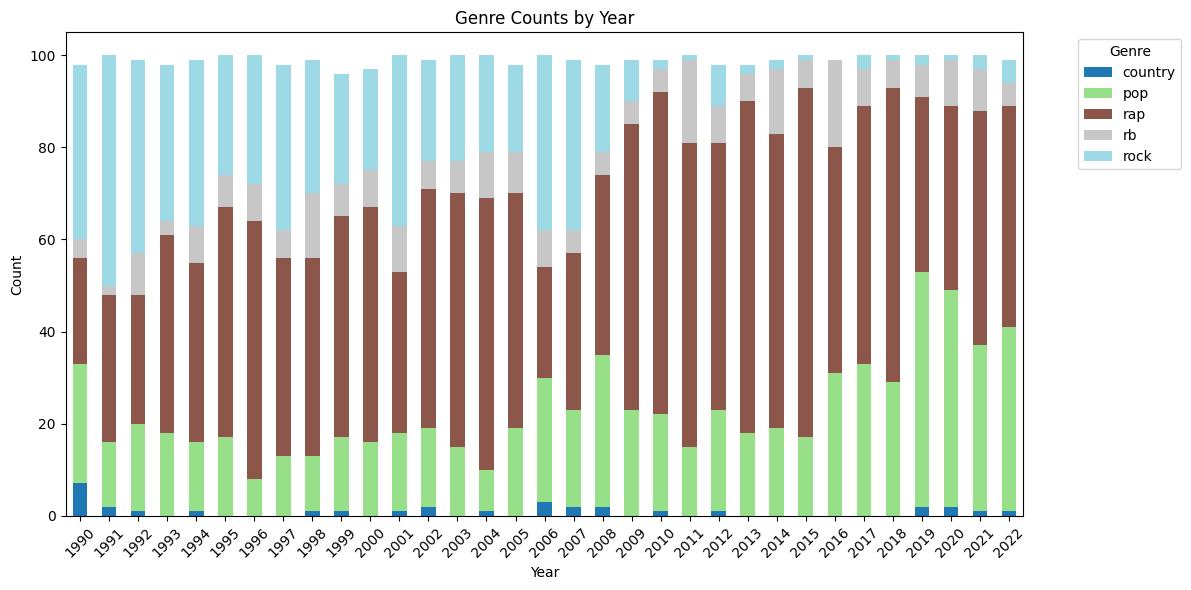

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe called df
# Make sure your year column is in datetime format if it's not
df = pd.read_csv('top_100_songs_1990_onwards.csv')

df = df[~(df["tag"] == "misc")]

# Group by year and tag (genre), and count the number of occurrences
grouped_df = df.groupby(['year', 'tag']).size().reset_index(name='count')

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='year', columns='tag', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))

# Add titles and labels
plt.title('Genre Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [2]:
#remove all rows where artist is genius
# Filter rows where 'artist' column contains the word 'genius'
df = df[~df['artist'].str.contains('genius', case=False, na=False)]



Preprocess data

In [3]:
import re
import string

def text_cleansing_nltk(data):
    # Define a function to clean a single text entry
    def clean_text(text):
        # Remove brackets and their content
        text = re.sub(r'[\(\[].*?[\)\]]', '', text)
        # Replace new line breaks with spaces
        text = text.replace("\n", ' ')
        # Lowercase everything
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Replace multiple spaces with a single space
        text = re.sub(' +', ' ', text)
        return text

    # Apply the clean_text function to each entry in the data
    return data.apply(clean_text)

# Apply the text_cleansing_nltk function to the 'Lyrics' column
df['cleared'] = text_cleansing_nltk(df['lyrics'])
df.head(10)


,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,cleared
0,Ice Ice Baby,rap,Vanilla Ice,1990,649119,{},"[Intro]\nYo VIP, let's kick it\n\n[Chorus]\nIc...",3586,en,en,en,yo vip lets kick it ice ice baby ice ice baby...
1,Poison,rb,Bell Biv DeVoe,1990,589697,{},"[Intro: Michael Bivins, Ronnie DeVoe, Ricky Be...",9286,en,en,en,yeah spyderman and freeze in full effect uhhu...
2,Can I Kick It?,rap,A Tribe Called Quest,1990,406455,{},"[Chorus: Q-Tip]\nCan I kick it? (Yes, you can!...",3021,en,en,en,can i kick it can i kick it can i kick it can...
3,Somewhere Over the Rainbow,pop,Israel Kamakawiwo'ole,1990,348557,"{""Israel Kamakawiwo\\'ole""}","[Intro]\nOoh-oh-oh, oh-oh-oh-oh, oh-oh-oh\nOoh...",415227,en,en,en,oohohoh ohohohoh ohohoh oohohohoh oohohoh ooh...
4,Wind of Change,rock,Scorpions,1990,320891,{},[Intro]\n(Whistling)\n\n[Verse 1]\nI follow th...,347866,en,en,en,i follow the moskva down to gorky park listen...
5,Thunderstruck,rock,AC/DC,1990,304487,{},"[Intro]\nThunder, ah\nThunder, ah\nThunder, ah...",291696,en,en,en,thunder ah thunder ah thunder ah thunder ah t...
6,Enjoy the Silence,pop,Depeche Mode,1990,302220,{},[Verse 1]\nWords like violence break the silen...,100856,en,en,en,words like violence break the silence come cr...
7,Christmas In Our Hearts,pop,Jose Mari Chan,1990,265992,{},[Verse 1: Jose Mari Chan]\nWhenever I see girl...,769859,en,en,en,whenever i see girls and boys selling lantern...
8,Bonita Applebum,rap,A Tribe Called Quest,1990,235713,{},[Intro: Q-Tip]\nDo I love you?\nDo I lust for ...,44691,en,en,en,do i love you do i lust for you am i a sinner...
9,U Cant Touch This,rap,MC Hammer,1990,223919,{},[Chorus]\nYou can't touch this\nYou can't touc...,2161,en,en,en,you cant touch this you cant touch this you c...


In [4]:
country_df = df[df["tag"] == "country"]
misc_df = df[df["tag"] == "misc"]
pop_df = df[df["tag"] == "pop"]
rap_df = df[df["tag"] == "rap"]
rb_df = df[df["tag"] == "rb"]
rock_df = df[df["tag"] == "rock"]

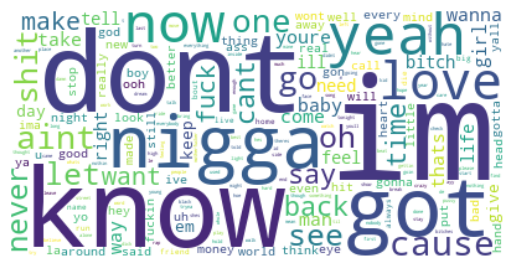

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(df['cleared']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

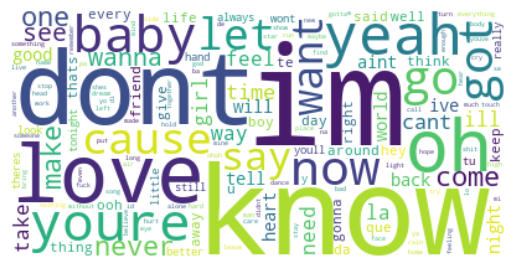

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(pop_df['cleared']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

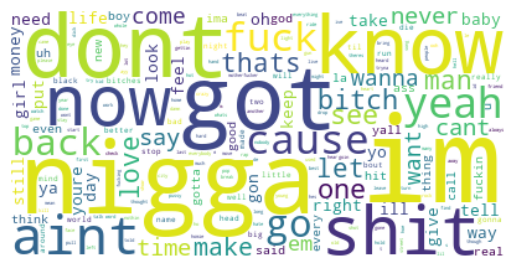

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(rap_df['cleared']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

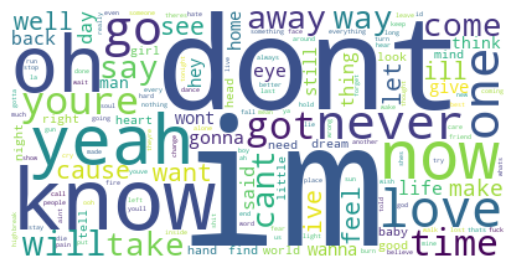

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(rock_df['cleared']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

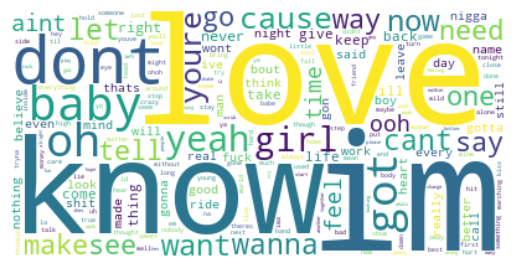

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(rb_df['cleared']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

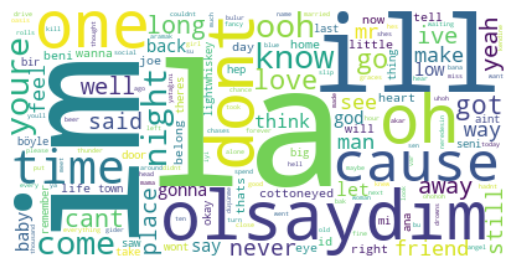

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(country_df['cleared']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
country_df

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,cleared
17,Kendine İyi Bak,country,Ahmet Kaya,1990,172081,{},[1. Bölüm]\nYan yana geçen geceler unutulup gi...,3512854,tr,tr,tr,yan yana geçen geceler unutulup gider mi acıl...
18,Friends in Low Places Live,country,Garth Brooks,1990,164265,{},"[Verse 1]\nBlame it all on my roots, I showed ...",204103,en,en,en,blame it all on my roots i showed up in boots...
21,The Thunder Rolls,country,Garth Brooks,1990,147712,{},"[Verse 1]\nThree thirty in the mornin', not a ...",340038,en,en,en,three thirty in the mornin not a soul in sigh...
42,Friends in Low Places,country,Garth Brooks,1990,84241,{},"[Verse 1]\nBlame it all on my roots, I showed ...",3949465,en,en,en,blame it all on my roots i showed up in boots...
48,Neredesin Sen Tatlı Dili Güler Yüze,country,Neet Erta,1990,76454,"{""Neşet Ertaş""}","[1. Bölüm]\nŞu garip hâlimden bilen, şiveli na...",2001249,tr,tr,tr,şu garip hâlimden bilen şiveli nazlım gönlüm ...
82,Dağlarda Kar Olsaydım,country,Ahmet Kaya,1990,46846,{},"[1. Bölüm]\nŞu dağlarda kar olsaydım, olsaydım...",3512708,tr,tr,tr,şu dağlarda kar olsaydım olsaydım bir asi rüz...
90,Unanswered Prayers,country,Garth Brooks,1990,44079,{},[Verse 1]\nJust the other night at a hometown ...,344464,en,en,en,just the other night at a hometown football g...
154,I Cant Make You Love Me,country,Bonnie Raitt,1991,125669,{},[Verse 1]\nTurn down the lights\nTurn down the...,951421,en,en,en,turn down the lights turn down the bed turn d...
173,Fancy,country,Reba McEntire,1991,88366,{},[Verse 1]\nI remember it all very well looking...,315638,en,en,en,i remember it all very well looking back it w...
266,The Night the Lights Went Out in Georgia,country,Reba McEntire,1992,148286,{},[Verse 1]\nHe was on his way home from Candlet...,336950,en,en,en,he was on his way home from candletop been tw...


In [13]:
import os
import pandas as pd
import spacy
from collections import Counter
from spacy import displacy

# Load spaCy's pre-trained model for English
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 3000000  # Example: increase to 2,000,000 characters

def ner_ranking_by_category(df):
    # Create a directory for saving entity rankings
    os.makedirs('entity_rankings', exist_ok=True)

    # Define the year ranges and seasons for grouping
    year_ranges = [(1990, 1999), (2000, 2009), (2010, 2019), (2020, 2022)]

    # Process data and create rankings
    for start_year, end_year in year_ranges:
        print(start_year)
        # Filter DataFrame for the specific year range and season
        filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
        print(len(filtered_df))
        # Combine all text entries for this specific group
        text = ' '.join(filtered_df['cleared'].dropna())
        
        # Skip if there's no text to analyze
        if not text.strip():
            continue

        # Perform NER with spaCy
        doc = nlp(text)

        # Extract entities and count their frequencies
        entities = [ent.text.lower() for ent in doc.ents]  # Lowercasing to normalize
        entity_counts = Counter(entities)
        
        # If no entities found, skip to next iteration
        if not entity_counts:
            continue

        # Create a DataFrame for ranking entities by frequency
        entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Frequency'])
        entity_df = entity_df.sort_values(by='Frequency', ascending=False)

        # Define file name for saving the entity ranking
        file_name = f"entity_rankings/entity_ranking_{start_year}-{end_year}.csv"

        entity_df = entity_df.head(100)
        
        # Save the entity ranking to a CSV file
        entity_df.to_csv(file_name, index=False)
        
# Example of calling the function with a DataFrame `df`
ner_ranking_by_category(df)


1990
984
2000
981
2010
981
2020
288


In [14]:
# Replace 'column_name' with the name of the column you want to count characters for
df['character_count'] = df['lyrics'].str.len()

# Sort the DataFrame by the character count in descending order
df = df.sort_values(by='character_count', ascending=False)

# Display the sorted DataFrame
print(df)


                                         title   tag  \
2463                          The Rap Monument   rap   
674                        June 27th Freestyle   rap   
2544         12/04/15: Oxxxymiron vs. Johnyboy   rap   
1407                                 Last Call   rap   
1947  Eminem Freestyles on Tim Westwood | 2009   rap   
...                                        ...   ...   
405                         The Cuppycake Song   pop   
309                                 I Love You   pop   
1087                       The National Anthem  rock   
2046                 Adventure Time Main Title   pop   
1603   Leaves From The Vine Little Soldier Boy   pop   

                          artist  year    views  \
2463                      Noisey  2014  1114720   
674                     DJ Screw  1996   182345   
2544               Versus Battle  2015  2176702   
1407                  Kanye West  2004   946843   
1947                      Eminem  2009   388446   
...                  

In [15]:
df.head(20)

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language,cleared,character_count
2463,The Rap Monument,rap,Noisey,2014,1114720,"{Raekwon,Pill,""Prodigy of Mobb Deep"",""Killer M...",[Intro]\nWe in the building\nYeah\nLet's go\n\...,641389,en,en,en,we in the building yeah lets go king push the...,42260
674,June 27th Freestyle,rap,DJ Screw,1996,182345,"{""Big Moe"",""Big Pokey"",YungStar,K-Luv,""Bird (P...",[Intro: Big Moe]\nThat nigga Big Ass Moe\nChil...,17300,en,en,en,that nigga big ass moe chilling with my partn...,26778
2544,12/04/15: Oxxxymiron vs. Johnyboy,rap,Versus Battle,2015,2176702,"{Oxxxymiron,Johnyboy}","[Раунд 1: Oxxxymiron]\nГовно, залупа, пенис, х...",777892,ru,ru,ru,говно залупа пенис хер давалка хуй блядина го...,22538
1407,Last Call,rap,Kanye West,2004,946843,{},[Produced by Evidence & Kanye West]\n\n[Intro:...,910,en,en,en,aight lets run it lets run it yo fuck you kan...,14678
1947,Eminem Freestyles on Tim Westwood | 2009,rap,Eminem,2009,388446,{​dEnAun},"[Prelude: Eminem, Mr. Porter & Tim Westwood]\n...",18924,en,en,en,yo blast me off tim wheres that boom blast me...,12944
2955,Pissy Pamper,rap,Young Nudy & Pi'erre Bourne,2019,1261204,"{""Kid Cudi"",""Playboi Carti"",""Young Nudy & Pi\\...",[Intro: Young Nudy]\nHuh?\nI'm gassin' this bi...,4383036,en,ms,NaN,huh im gassin this bitch i smoke on the big b...,12673
2548,Mortal Man,rap,Kendrick Lamar,2015,1954693,{},[Intro: James Fauntleroy + Kendrick Lamar]\nOh...,721854,en,en,en,ohhh ohhhh woahhh uh yeah uh yeah uh yeah uh ...,11602
2214,Sing About Me Im Dying of Thirst,rap,Kendrick Lamar,2012,3052024,{},"[Part I: ""Sing About Me""]\n\n[Chorus]\nWhen th...",90479,en,en,en,when the lights shut off and its my turn to s...,11063
743,Demain c’est loin,rap,IAM,1997,286304,{},"[Couplet 1 : Shurik'N]\nL'encre coule, le sang...",50306,fr,fr,fr,lencre coule le sang se répand la feuille buv...,10436
2215,Oldie,rap,Odd Future,2012,2812525,{},"[Intro: Taco & Tyler, the Creator]\nYo, shout ...",68399,en,en,en,yo shout out to everybody that worked on the ...,9823


In [16]:
# Replace 'year' with the name of the column containing the year
# Replace 'lyrics' with the name of the column containing the lyrics text
df['lyrics_length'] = df['lyrics'].str.len()  # Calculate the character count for each lyrics entry

# Group by year and calculate the average length of lyrics for each year
average_lyrics_length_per_year = df.groupby('year')['lyrics_length'].mean().reset_index()



In [17]:
# Sort by longest average lyrics length first
average_lyrics_length_per_year = average_lyrics_length_per_year.sort_values(by='lyrics_length', ascending=False)

# Display the result
print(average_lyrics_length_per_year)


    year  lyrics_length
24  2014    3648.375000
6   1996    3555.230000
23  2013    3426.204082
20  2010    3380.412371
22  2012    3360.091837
25  2015    3347.600000
19  2009    3139.762887
14  2004    3023.780000
13  2003    3017.710000
12  2002    2994.765306
21  2011    2946.310000
28  2018    2882.377551
31  2021    2870.959184
5   1995    2844.670000
10  2000    2825.824742
26  2016    2818.828283
9   1999    2811.260417
8   1998    2808.744898
7   1997    2792.802083
30  2020    2732.833333
11  2001    2675.531250
27  2017    2660.530000
15  2005    2609.134021
18  2008    2537.319588
29  2019    2483.821053
3   1993    2415.928571
16  2006    2383.970000
4   1994    2349.151515
32  2022    2337.031915
2   1992    2231.696970
17  2007    2222.666667
1   1991    2208.250000
0   1990    2024.755102
